In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import metrics
%matplotlib inline

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df_train = pd.read_table('/home/sibi/acad/mach_learn_with_networks/assignment/2_lm_opt/bclass/bclass/bclass-train',delimiter='\t',header=None)
df_test = pd.read_table('/home/sibi/acad/mach_learn_with_networks/assignment/2_lm_opt/bclass/bclass/bclass-test',delimiter='\t',header=None)

In [3]:
#Converting -1 to 0
df_train.head()
df_train.loc[df_train[0] == -1,0] = 0
df_test.loc[df_test[0] == -1,0] = 0
df_train = df_train.drop(2, 1) #CAREFUL
df_test = df_test.drop(2,1) #CAREFUL LABEL NAMES


In [4]:
#Splitting as features and labels
X_train = df_train.loc[:,1:]
y_train = df_train.loc[:,0]
X_test = df_test.loc[:,1:]
y_test = df_test.loc[:,0]

In [5]:
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

In [6]:
# X_train_norm_l1 = preprocessing.normalize(X_train, norm='l1')
# X_train_norm_l2 = preprocessing.normalize(X_train, norm='l2')
# X_test_norm_l1 = preprocessing.normalize(X_test, norm='l1')
# X_test_norm_l2 = preprocessing.normalize(X_test, norm='l2')

In [7]:
def logistic_func(theta,x):
    return float(1) / (1 + math.e**(-x.dot(theta)))

In [8]:

def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

In [9]:

def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

In [10]:
def pred_values(theta, X, hard=True):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [11]:
def grad_desc(theta_values, X_train, y_train, X_test, y_test, lr=.001, converge_change=.00001,n_iter = 100000):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
   
    #setup cost iter
    cost_iter = []
    train_pred_acc = []
    test_pred_acc = []
    cost = cost_func(theta_values, X_train, y_train)
    train_acc = metrics.accuracy_score(y_train, pred_values(theta_values, X_train))
    test_acc = metrics.accuracy_score(y_test, pred_values(theta_values, X_test))
    
    cost_iter.append([0, cost])
    train_pred_acc.append([0,train_acc])
    test_pred_acc.append([0,test_acc])
    change_cost = 1
    i = 1
    
    while(change_cost > converge_change and i < n_iter):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X_train, y_train))
        cost = cost_func(theta_values, X_train, y_train)
        train_acc = metrics.accuracy_score(y_train, pred_values(theta_values, X_train))
        test_acc = metrics.accuracy_score(y_test, pred_values(theta_values, X_test))

        cost_iter.append([i, cost])
        train_pred_acc.append([i, train_acc])
        test_pred_acc.append([i,test_acc])
        change_cost = old_cost - cost
        i+=1
        
    return theta_values, np.array(cost_iter), np.array(train_pred_acc), np.array(test_pred_acc)

In [12]:
X_train_m = X_train.as_matrix()
y_train_m = y_train.as_matrix()
X_test_m = X_test.as_matrix()
y_test_m = y_test.as_matrix()

In [13]:
shape = X_train_m.shape[1]
betas = np.zeros(shape)
fitted_values, cost_iter, train_pred_accuracy,test_pred_accuracy = grad_desc(betas, X_train_m, y_train_m,X_test_m, y_test_m)

In [14]:
# print train_pred_accuracy[-1,1]
# printnt test_pred_accuracy[-1,1]
# from sklearn import linear_model
# logreg = linear_model.LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print metrics.accuracy_score(y_test,y_pred)

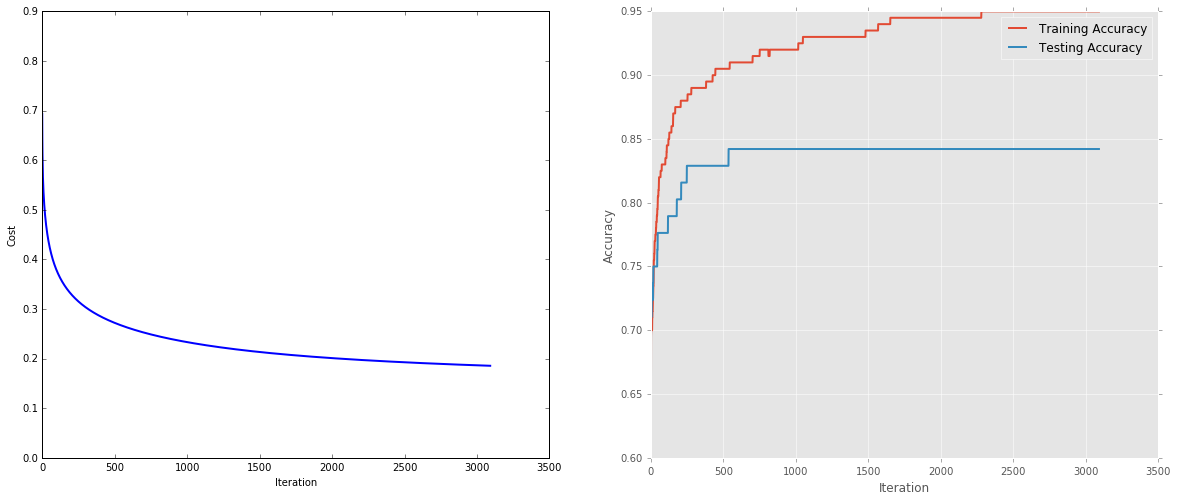

In [15]:
fig = plt.figure(figsize=(20, 8))
ax1= fig.add_subplot(1,2,1)
plt.style.use('ggplot')
ax1.plot(cost_iter[:,0], cost_iter[:,1],linewidth=2.0)

ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.set_ylim(0,0.9)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(train_pred_accuracy[:,0], train_pred_accuracy[:,1],linewidth=2.0,label="Training Accuracy")
ax2.plot(test_pred_accuracy[:,0], test_pred_accuracy[:,1],linewidth=2.0,label="Testing Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Iteration")
ax2.legend()

In [16]:
X_train_norm_l1 = preprocessing.normalize(X_train_m, norm='l1')
X_train_norm_l2 = preprocessing.normalize(X_train_m, norm='l2')
X_test_norm_l1 = preprocessing.normalize(X_test_m, norm='l1')
X_test_norm_l2 = preprocessing.normalize(X_test_m, norm='l2')
# y_train_norm_l1 = preprocessing.normalize(y_train_m, norm='l1')[0]
# y_train_norm_l2 = preprocessing.normalize(y_train_m, norm='l2')[0]
# y_test_norm_l1 = preprocessing.normalize(y_test_m, norm='l1')[0]
# y_test_norm_l2 = preprocessing.normalize(y_test_m, norm='l2')[0]

In [17]:
shape = X_train_norm_l1.shape[1]
betas = np.zeros(shape)
fitted_values, cost_iter, train_pred_accuracy,test_pred_accuracy = grad_desc(betas, X_train_norm_l1, y_train_m,X_test_norm_l1, y_test_m)

0.81
0.815789473684


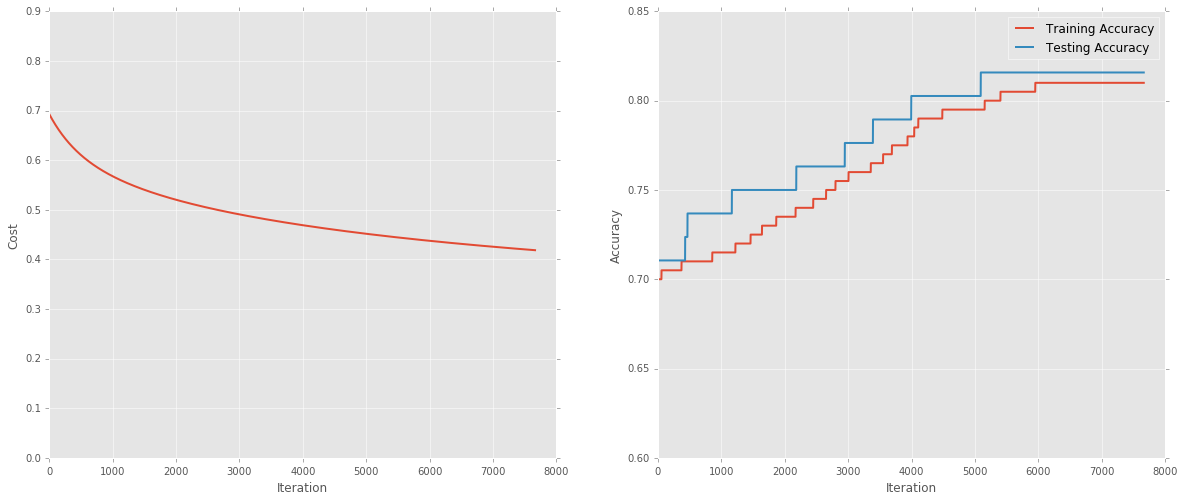

In [18]:
print train_pred_accuracy[-1,1]
print test_pred_accuracy[-1,1]

fig = plt.figure(figsize=(20, 8))
ax1= fig.add_subplot(1,2,1)
plt.style.use('ggplot')
ax1.plot(cost_iter[:,0], cost_iter[:,1],linewidth=2.0)

ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.set_ylim(0,0.9)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(train_pred_accuracy[:,0], train_pred_accuracy[:,1],linewidth=2.0,label="Training Accuracy")
ax2.plot(test_pred_accuracy[:,0], test_pred_accuracy[:,1],linewidth=2.0,label="Testing Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Iteration")
ax2.legend()

In [19]:
shape = X_train_norm_l1.shape[1]
betas = np.zeros(shape)
fitted_values, cost_iter, train_pred_accuracy,test_pred_accuracy = grad_desc(betas, X_train_norm_l2, y_train_m,X_test_norm_l2, y_test_m)

0.88
0.842105263158


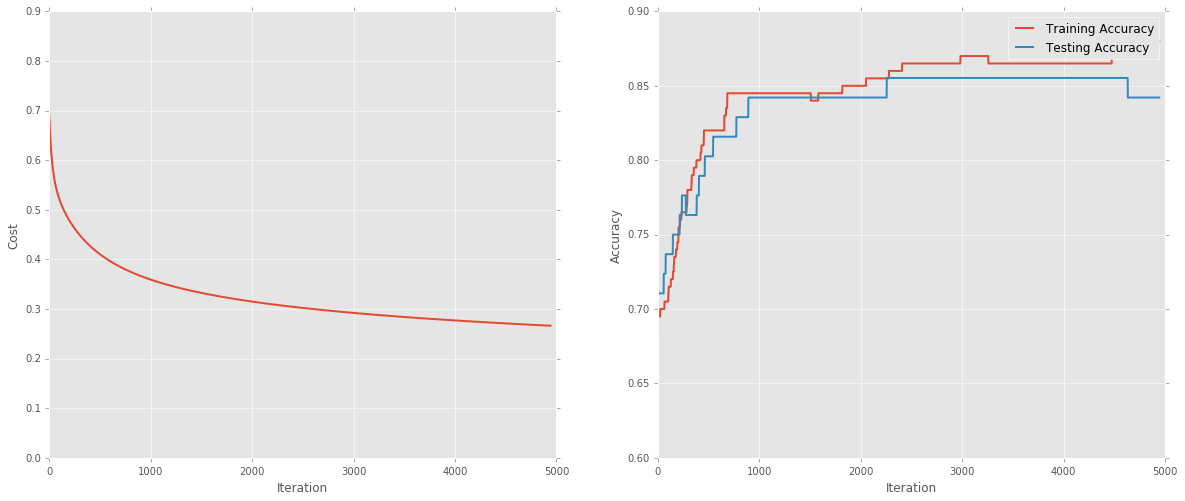

In [20]:
print train_pred_accuracy[-1,1]
print test_pred_accuracy[-1,1]

fig = plt.figure(figsize=(20, 8))
ax1= fig.add_subplot(1,2,1)
plt.style.use('ggplot')
ax1.plot(cost_iter[:,0], cost_iter[:,1],linewidth=2.0)

ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.set_ylim(0,0.9)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(train_pred_accuracy[:,0], train_pred_accuracy[:,1],linewidth=2.0,label="Training Accuracy")
ax2.plot(test_pred_accuracy[:,0], test_pred_accuracy[:,1],linewidth=2.0,label="Testing Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Iteration")
ax2.legend()